In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from day_ahead_v2.utils.plot_settings import apply_plot_settings, color_palette_2

In [2]:
apply_plot_settings()
list_colors = list(color_palette_2.values())
print(list_colors)

[(0.26666666666666666, 0.4666666666666667, 0.6666666666666666), (0.4, 0.8, 0.9333333333333333), (0.13333333333333333, 0.5333333333333333, 0.2), (0.8, 0.7333333333333333, 0.26666666666666666), (0.9333333333333333, 0.4, 0.4666666666666667), (0.6666666666666666, 0.2, 0.4666666666666667), (0.7333333333333333, 0.7333333333333333, 0.7333333333333333)]


In [5]:
# Import the data
model = np.array(["lightgbm", "xgboost", "mlp", "logistic_regression", "balance", "bid_forecast", "hindsight"])

data = {}

for m in model:
    data[m] = pd.read_csv(f"/home/yahei/code/day_ahead_v2/reports/large/{m}/imbalance_data/backtest_results.csv")
print(data["lightgbm"].head())
print(data["lightgbm"].columns)

   train_profit_total  train_profit_mean  test_profit_total  test_profit_mean  \
0       546507.277188         189.759471        9508.283655         56.596927   
1       510018.770145         177.089851       12301.394394         73.222586   
2       468334.159845         162.616028       10658.475498         63.443307   
3       430642.138247         149.528520       26265.977186        156.345102   
4       417760.110736         145.055594       11459.454778         68.211040   

   train_accuracy  train_roc_auc  train_f1_score  test_accuracy  test_roc_auc  \
0        0.864583       0.967062        0.853485       0.523810      0.587960   
1        0.858681       0.963098        0.845781       0.446429      0.394739   
2        0.715972       0.890154        0.669346       0.494048      0.486215   
3        0.866667       0.969413        0.855713       0.303571      0.460775   
4        0.871528       0.968971        0.858579       0.392857      0.548877   

   test_f1_score  ...     

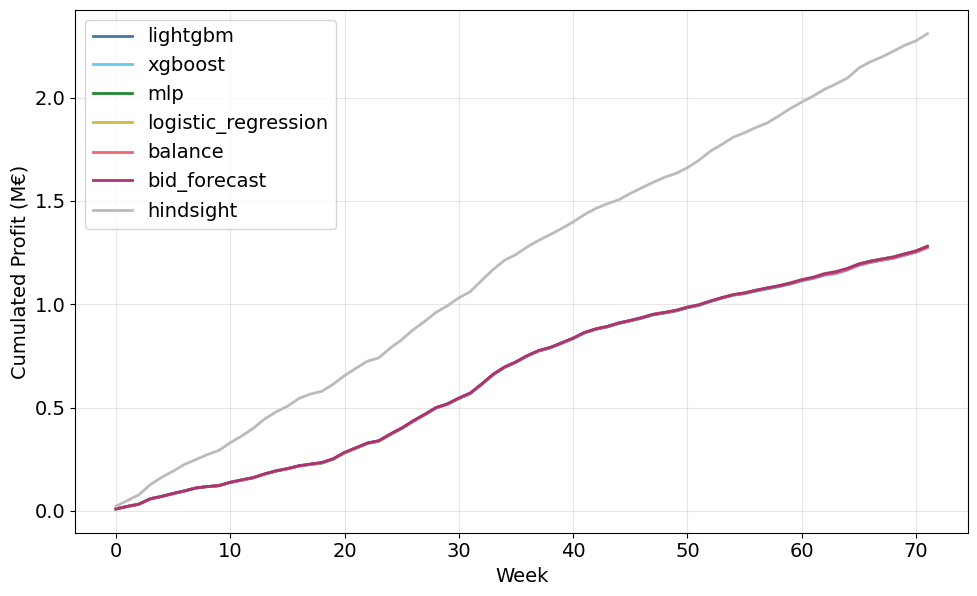

In [6]:
plt.figure()

for i, m in enumerate(model):
    plt.plot(data[m]["test_profit_total"].cumsum() / 1e6, label=m, linewidth=2, color=list_colors[i])

plt.xlabel("Week")
plt.ylabel("Cumulated Profit (M€)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
for m in model[0:4]:
    optimizer_ModelDeficit_x = data[m]["optimizer_ModelDeficit_x"].mean()
    optimizer_ModelDeficit_x_std = data[m]["optimizer_ModelDeficit_x"].std()
    optimizer_ModelSurplus_x = data[m]["optimizer_ModelSurplus_x"].mean()
    optimizer_ModelSurplus_x_std = data[m]["optimizer_ModelSurplus_x"].std()
    optimizer_ModelBalance_x = data[m]["optimizer_ModelBalance_x"].mean()
    optimizer_ModelBalance_x_std = data[m]["optimizer_ModelBalance_x"].std()
    print(f"{m}: Deficit {optimizer_ModelDeficit_x:.4f} ± {optimizer_ModelDeficit_x_std:.4f}, Surplus {optimizer_ModelSurplus_x:.4f} ± {optimizer_ModelSurplus_x_std:.4f}, Balance {optimizer_ModelBalance_x:.4f} ± {optimizer_ModelBalance_x_std:.4f}")

lightgbm: Deficit 0.0000 ± 0.0000, Surplus 0.7363 ± 1.0005, Balance 0.3456 ± 0.3513
xgboost: Deficit -0.0294 ± 0.2498, Surplus 0.6052 ± 0.8196, Balance 0.3714 ± 0.4201
mlp: Deficit 0.0000 ± 0.0000, Surplus 0.5445 ± 0.5945, Balance 0.4489 ± 0.5282
logistic_regression: Deficit -0.1644 ± 0.2972, Surplus 0.9576 ± 1.1782, Balance 0.0000 ± 0.0000


In [8]:
# ModelBalance 
ModelBalance_x = data["balance"]["optimizer_ModelBalance_x"].mean()
ModelBalance_x_std = data["balance"]["optimizer_ModelBalance_x"].std()
print(f"balance: {ModelBalance_x:.4f} ± {ModelBalance_x_std:.4f}")

balance: 1.9853 ± 1.4557
